<a href="https://colab.research.google.com/github/eyaguirat10/CoWin-Breast-Cancer-Detection/blob/samar/MiniProjet_ML2_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **I. Business Understanding**



  **Problem Statement:**
  
Le projet “Breast Cancer Detection” vise à concevoir un modèle de machine learning capable d’aider les médecins à distinguer les tumeurs bénignes des tumeurs malignes à partir de données médicales.


**BO (Business Objective):**
Améliorer la précision et la rapidité du diagnostic du cancer du sein pour réduire les erreurs médicales et faciliter la détection précoce.

**DSO (Data Science Objective):**
Développer un modèle de classification supervisée performant et interprétable, évalué selon les métriques de précision, rappel et AUC, et le comparer à d’autres modèles de référence.



**Success Criteria :**
Les succès seront mesurés par la qualité prédictive du modèle, son interprétabilité, et sa reproductibilité.




# **II. Data Understanding**

## **Importing librairies**

Importing libraries is essential because it provides access to pre-existing functions, methods, and tools, making data analysis easier.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

## **II.1. Data Loading**

This allows us to access the raw data and begin exploring its structure, missing values, and data types.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import os

file_path = "/content/drive/MyDrive/Dataset_ML/data.csv"

# Check if the file exists before trying to read it
if os.path.exists(file_path):
    try:
        # Try reading with utf-8 first (default)
        df = pd.read_csv(file_path)
        print(f"Successfully loaded CSV with utf-8: {df.shape[0]} rows, {df.shape[1]} columns")
    except UnicodeDecodeError:
        try:
            # If utf-8 fails, try latin-1
            df = pd.read_csv(file_path, encoding='latin-1')
            print(f"Successfully loaded CSV with latin-1: {df.shape[0]} rows, {df.shape[1]} columns")
        except Exception as e:
            print(f"Error loading CSV with latin-1: {e}")
            df = None # Ensure df is None if loading fails
    except Exception as e:
        print(f"An unexpected error occurred while loading CSV: {e}")
        df = None # Ensure df is None if loading fails
else:
    print(f"Error: The file was not found at {file_path}")
    df = None # Ensure df is None if file is not found

if df is not None:
    # Display the first few rows if the dataframe was loaded successfully
    display(df.head())

Successfully loaded CSV with utf-8: 569 rows, 33 columns


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


## **II.2. Dataset Overview**

This step helps to quickly understand the structure and content of the dataset.

#### Basic information about the dataset

In [ ]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [ ]:
df.tail()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN
568,92751,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [ ]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [ ]:
df.dtypes

,0
id,int64
diagnosis,object
radius_mean,float64
texture_mean,float64
perimeter_mean,float64
area_mean,float64
smoothness_mean,float64
compactness_mean,float64
concavity_mean,float64
concave points_mean,float64


## **II.3. Missing Values Analysis**

In this step, we calculate how many missing (null) values exist in each column of the dataset. This information is important because columns with many missing values may need special handling, such as imputation or removal, to ensure the quality of our analysis and models.

In [ ]:
info_df = pd.DataFrame({
        'Column': df.columns,
        'Non_Null_Count': df.count(),
        'Null_Count': df.isnull().sum(),
        'Missing_%': (df.isnull().sum() / len(df) * 100).round(2)
    })
print(info_df.to_string(index=False))


                 Column  Non_Null_Count  Null_Count  Missing_%
                     id             569           0        0.0
              diagnosis             569           0        0.0
            radius_mean             569           0        0.0
           texture_mean             569           0        0.0
         perimeter_mean             569           0        0.0
              area_mean             569           0        0.0
        smoothness_mean             569           0        0.0
       compactness_mean             569           0        0.0
         concavity_mean             569           0        0.0
    concave points_mean             569           0        0.0
          symmetry_mean             569           0        0.0
 fractal_dimension_mean             569           0        0.0
              radius_se             569           0        0.0
             texture_se             569           0        0.0
           perimeter_se             569           0    

## **II.4. Categorical Variables Analysis**

This step focuses on analyzing categorical columns in the dataset. We first identify columns with object or category data types.

In [ ]:
categorical_cols = df.select_dtypes(include=['object', 'category']).columns
if len(categorical_cols) > 0:
  print("CATEGORICAL COLUMNS SUMMARY:")
  for col in categorical_cols:
      unique_count = df[col].nunique()
      print(f"{col}: {unique_count} unique values")
      if unique_count <= 10:
         print(f"   Values: {df[col].value_counts().head().to_dict()}")
      else:
         print(f"   Top 5: {df[col].value_counts().head().to_dict()}")
      print()

CATEGORICAL COLUMNS SUMMARY:
diagnosis: 2 unique values
   Values: {'B': 357, 'M': 212}



## **II.5. Duplicate Analysis**

In this step, we check the dataset for duplicate rows. Duplicate records can skew analysis and models by overrepresenting certain data points.

In [ ]:
duplicate_count = df.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicate_count}")
if duplicate_count > 0:
    print(f"Percentage: {(duplicate_count/len(df)*100):.2f}%")
print()


Number of duplicate rows: 0



## **II.6. Data Visualization**

Boxplots are used to visualize the distribution of numerical data and detect outliers. They display the median, quartiles, and potential extreme values for each feature, helping us understand variability and spot anomalies that may need further investigation or treatment.

#### Create boxplots for numerical columns

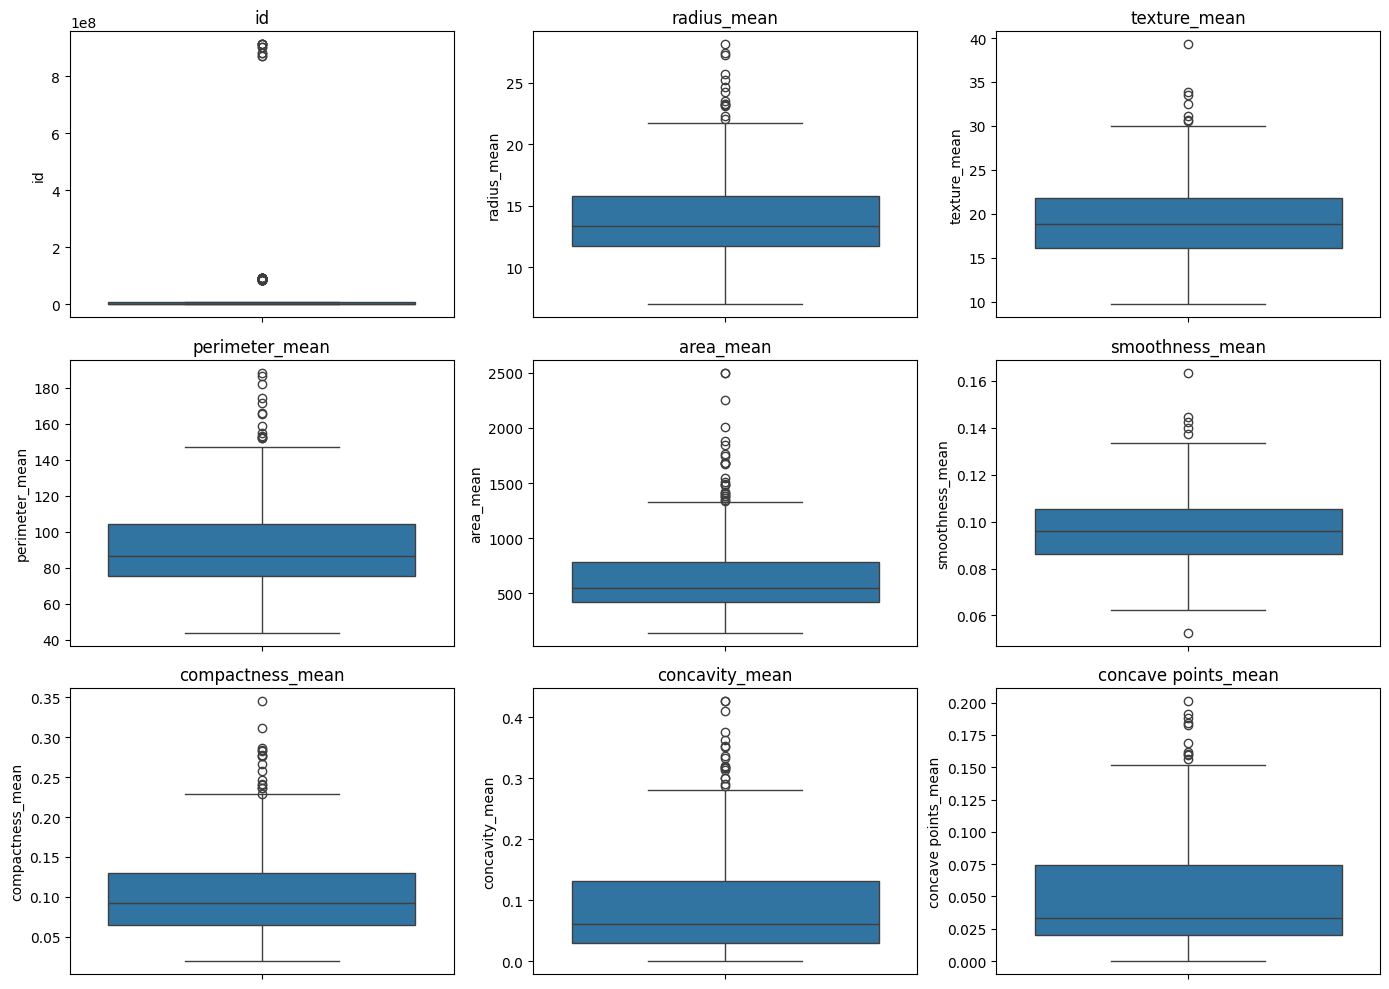

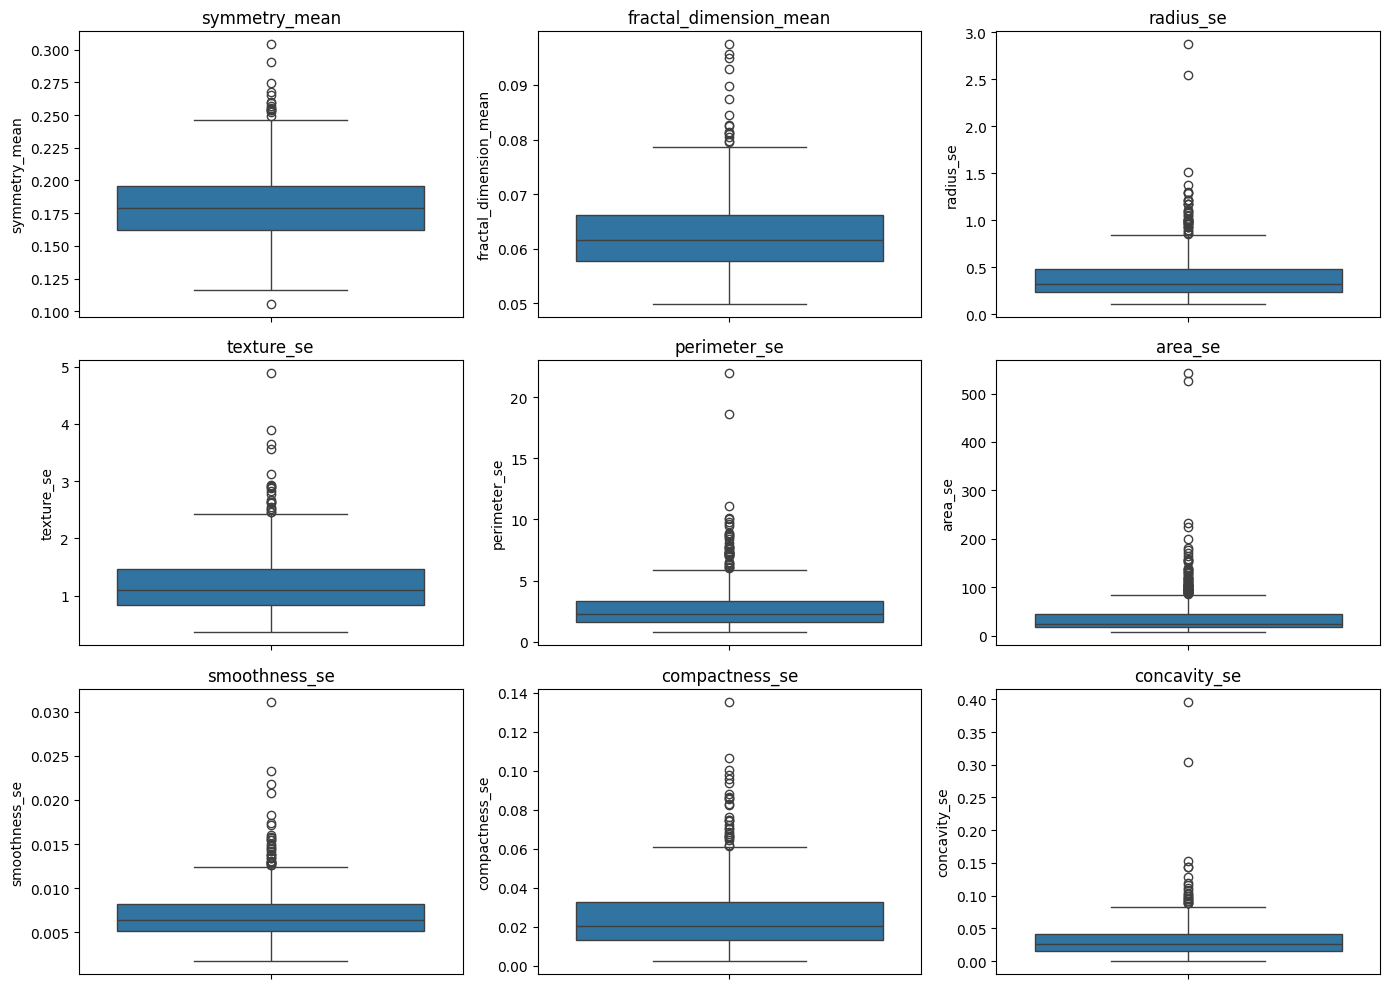

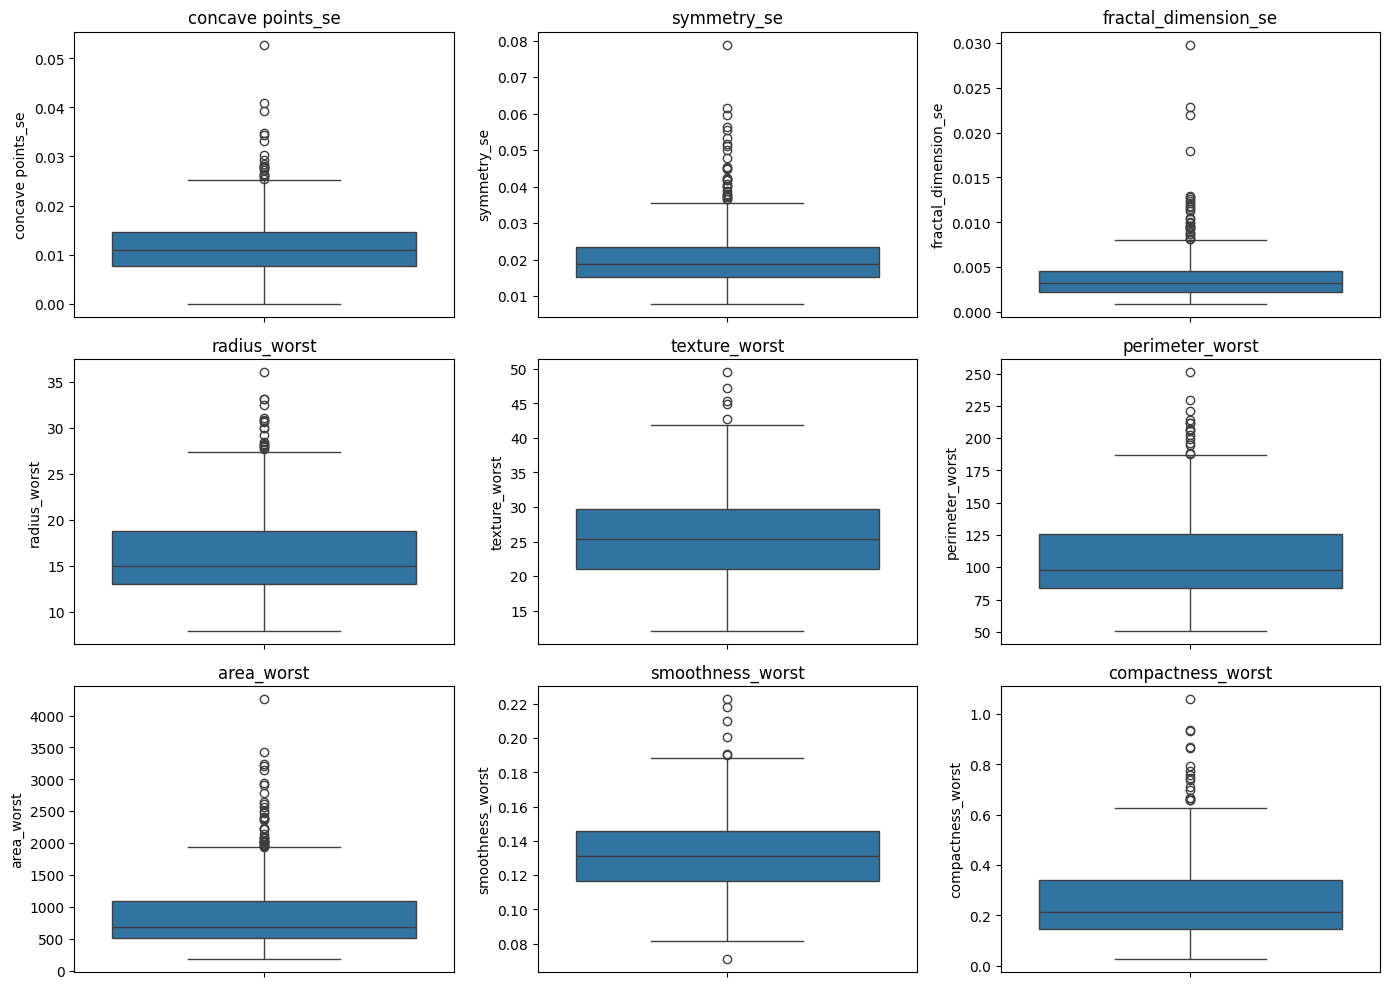

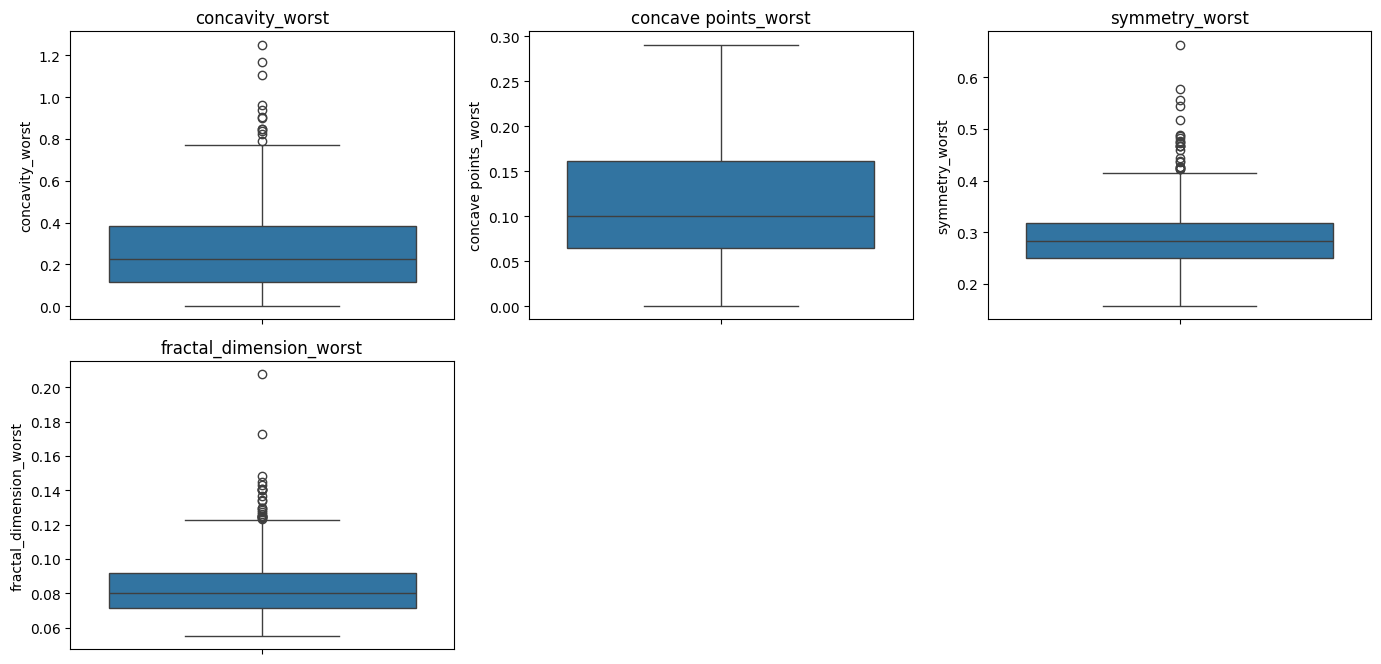

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import math

numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

numerical_cols = [col for col in numerical_cols if df[col].dropna().shape[0] > 0]
cols_per_fig = 9  # number of boxplots per figure

for start in range(0, len(numerical_cols), cols_per_fig):
    end = start + cols_per_fig
    batch = numerical_cols[start:end]

    plt.figure(figsize=(14, 10))
    for i, col in enumerate(batch, 1):
        plt.subplot(3, 3, i)  # 2 rows, 3 columns
        sns.boxplot(y=df[col])
        plt.title(col)

    plt.tight_layout()
    plt.show()


Ce dataset a été construit pour la recherche → les outliers ne sont pas des erreurs, ce sont des annomalies reliés à la maladie


Correlation Visualization:

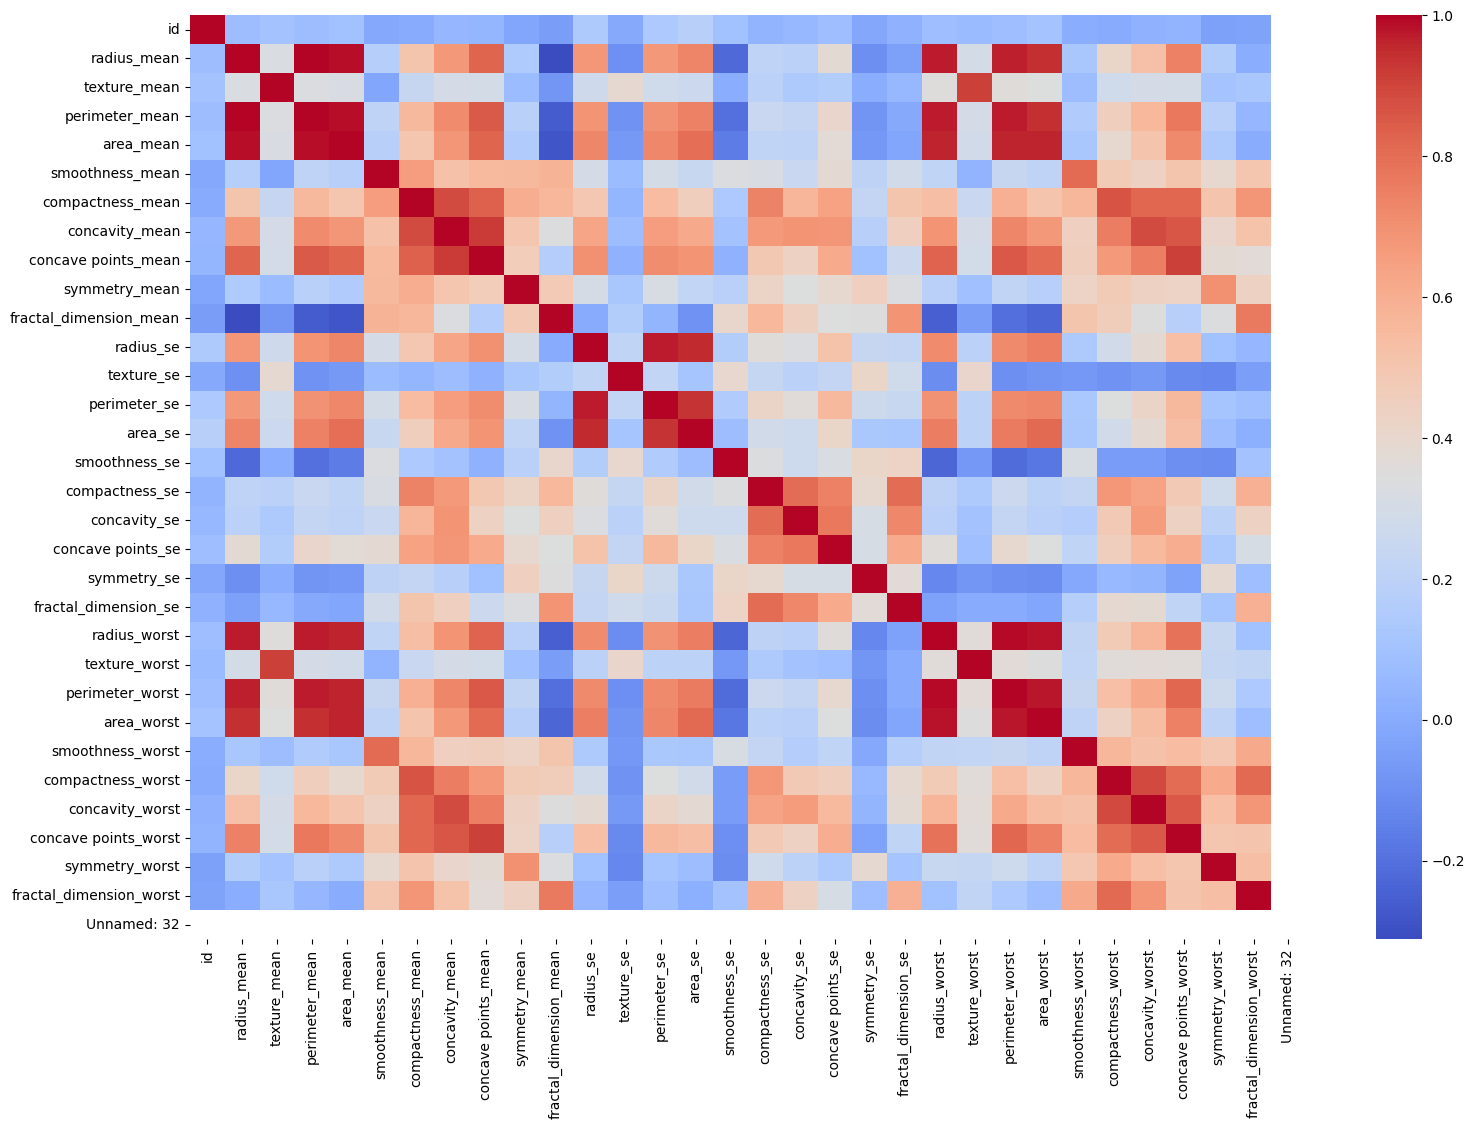

In [ ]:
# matrice de correllation les variables entre eux
df_features = df.drop(columns=['diagnosis'])
plt.figure(figsize=(18, 12))
sns.heatmap(df_features.corr(), annot=False, cmap='coolwarm')
plt.show()


In [ ]:
# matrice de correllation les variables avec la target
# creation de diagnosis numerique
df['diagnosis_num'] = df['diagnosis'].map({'M':1, 'B':0})
df_features['diagnosis_num'] = df['diagnosis'].map({'M':1, 'B':0})
df_features.corr()['diagnosis_num'].sort_values(ascending=False)



,diagnosis_num
diagnosis_num,1.000000
concave points_worst,0.793566
perimeter_worst,0.782914
concave points_mean,0.776614
radius_worst,0.776454
perimeter_mean,0.742636
area_worst,0.733825
radius_mean,0.730029
area_mean,0.708984
concavity_mean,0.696360


# **III. Data Preparation**






## III.1. Data Transformation


In [ ]:
#suppression de Unnamed: 32  et id
df.drop(columns=['Unnamed: 32', 'id'], inplace=True, errors='ignore')
df.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'diagnosis_num'],
      dtype='object')

In [ ]:
#on va pas supprimer les vameurs abberantes

In [ ]:
# standardisation
# La target
y = df['diagnosis_num']
# Features (toutes les colonnes numériques sauf diagnosis)
X = df.drop(columns=['diagnosis', 'diagnosis_num'])


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convertir en DataFrame pour garder les noms des colonnes
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)


## III.4. Dimensionality Reduction

PCA is used to reduce the number of features in a dataset while retaining most of the original variance. By transforming correlated variables into a smaller set of uncorrelated components, PCA simplifies the dataset, speeds up computation, and can help improve model performance while reducing noise.

### Principal Component Analysis (PCA)

In [ ]:
# Appliquer PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled_df)

# Variance expliquée
explained_variance = pca.explained_variance_ratio_
cum_var = np.cumsum(explained_variance)

# Afficher le tableau PCA
pca_table = pd.DataFrame({
    'PC': [f'PC{i+1}' for i in range(len(explained_variance))],
    'Variance': explained_variance,
    'Cumulative Variance': cum_var
})
print(pca_table)


      PC  Variance  Cumulative Variance
0    PC1  0.442720             0.442720
1    PC2  0.189712             0.632432
2    PC3  0.093932             0.726364
3    PC4  0.066021             0.792385
4    PC5  0.054958             0.847343
5    PC6  0.040245             0.887588
6    PC7  0.022507             0.910095
7    PC8  0.015887             0.925983
8    PC9  0.013896             0.939879
9   PC10  0.011690             0.951569
10  PC11  0.009797             0.961366
11  PC12  0.008705             0.970071
12  PC13  0.008045             0.978117
13  PC14  0.005234             0.983350
14  PC15  0.003138             0.986488
15  PC16  0.002662             0.989150
16  PC17  0.001980             0.991130
17  PC18  0.001754             0.992884
18  PC19  0.001649             0.994533
19  PC20  0.001039             0.995572
20  PC21  0.000999             0.996571
21  PC22  0.000915             0.997486
22  PC23  0.000811             0.998297
23  PC24  0.000602             0.998899


In [ ]:
# Contribution de chaque variable à PC1 et PC2
pcs = pca.components_[:2]
contrib = np.square(pcs)  # pcs = pca.components_[:2]
contrib_sum = contrib.sum(axis=0)
# Trier et garder les top 12
top_idx = np.argsort(contrib_sum)[-12:]
top_features = X_scaled_df.columns[top_idx]


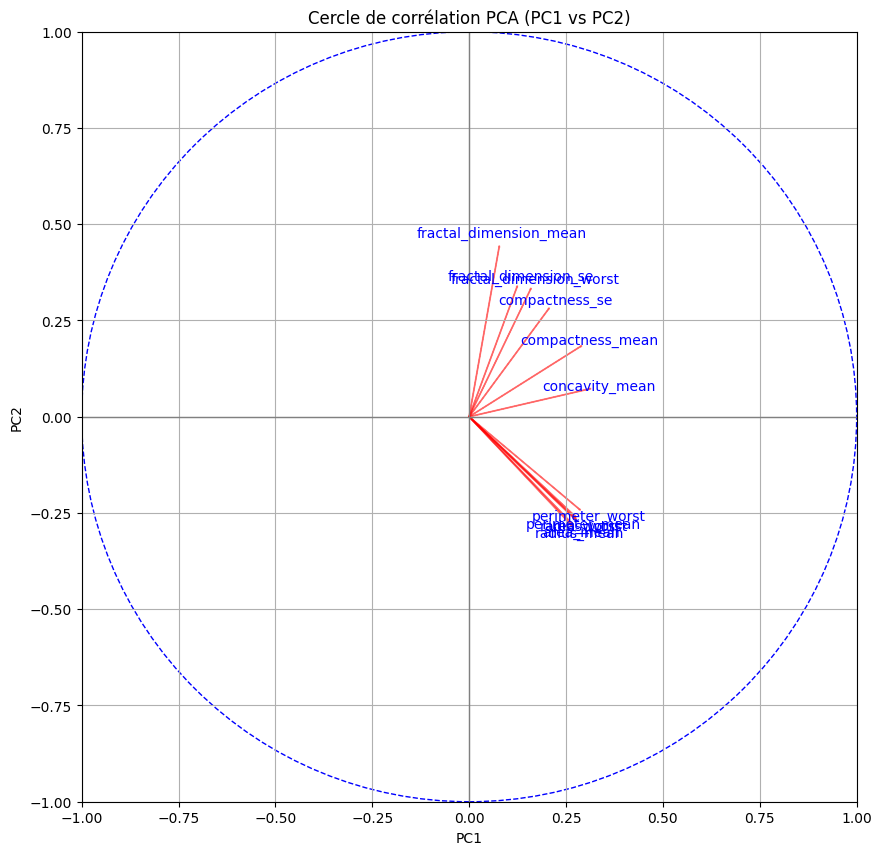

In [ ]:
plt.figure(figsize=(10,10))
plt.title('Cercle de corrélation PCA (PC1 vs PC2)')
plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.axhline(0, color='grey', lw=1)
plt.axvline(0, color='grey', lw=1)

for i, col in enumerate(top_features):
    plt.arrow(0, 0, pcs[0, top_idx[i]]*1.2, pcs[1, top_idx[i]]*1.2, color='r', alpha=0.5)
    plt.text(pcs[0, top_idx[i]]*1.3, pcs[1, top_idx[i]]*1.3, col, color='b', ha='center', va='center')

circle = plt.Circle((0,0), 1, facecolor='none', edgecolor='b', linestyle='--')
plt.gca().add_artist(circle)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.grid()
plt.show()


# **IV. Modeling**

# **SVM**

In [ ]:
from sklearn.model_selection import train_test_split

# 1. Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 2. Standardisation  (FIT uniquement sur train)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)


In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

svm = SVC(kernel='linear', C=1)
svm.fit(X_train_scaled, y_train)

y_pred = svm.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.9649122807017544
[[72  0]
 [ 4 38]]
              precision    recall  f1-score   support

           0       0.95      1.00      0.97        72
           1       1.00      0.90      0.95        42

    accuracy                           0.96       114
   macro avg       0.97      0.95      0.96       114
weighted avg       0.97      0.96      0.96       114



In [ ]:
kernels = ['linear', 'rbf', 'poly', 'sigmoid']

for k in kernels:
    model = SVC(kernel=k, C=1, gamma='scale')
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    print(f"Kernel: {k}")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print()


Kernel: linear
Accuracy: 0.9649122807017544

Kernel: rbf
Accuracy: 0.9736842105263158

Kernel: poly
Accuracy: 0.8859649122807017

Kernel: sigmoid
Accuracy: 0.9473684210526315



=> meilleur modèle: SVM avec Kernel  rbf
accuracy: 0.9736842105263158


SVM avec les Features les plus importantes


In [ ]:
#importance des features avec randomforest
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=300, random_state=42)
rf.fit(X_train, y_train)

rf_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': rf.feature_importances_
}).sort_values('importance', ascending=False)

rf_importance.head(10)


,feature,importance
22,perimeter_worst,0.143121
23,area_worst,0.142449
27,concave points_worst,0.112978
7,concave points_mean,0.088663
20,radius_worst,0.082649
0,radius_mean,0.061043
2,perimeter_mean,0.052928
3,area_mean,0.043820
6,concavity_mean,0.039761
13,area_se,0.032237


In [ ]:
# 1. Sélection des features importantes
top_features = [
    'perimeter_worst',
    'area_worst',
    'concave points_worst',
    'concave points_mean',
    'radius_worst',
    'radius_mean',
    'perimeter_mean',
    'area_mean',
    'concavity_mean',
    'area_se'
]

X_selected = df[top_features]
y = df['diagnosis_num']


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Split
X_train, X_test, y_train, y_test = train_test_split(
    X_selected, y, test_size=0.2, random_state=42, stratify=y
)

# Standardisation
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

# SVM
svm = SVC(kernel='linear', C=1)
svm.fit(X_train_scaled, y_train)

# Test
y_pred = svm.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.956140350877193
[[72  0]
 [ 5 37]]
              precision    recall  f1-score   support

           0       0.94      1.00      0.97        72
           1       1.00      0.88      0.94        42

    accuracy                           0.96       114
   macro avg       0.97      0.94      0.95       114
weighted avg       0.96      0.96      0.96       114



In [ ]:
kernels = ['linear', 'rbf', 'poly', 'sigmoid']
for k in kernels:
    svm = SVC(kernel=k, C=1)
    svm.fit(X_train_scaled, y_train)
    y_pred = svm.predict(X_test_scaled)
    print(k, accuracy_score(y_test, y_pred))


linear 0.956140350877193
rbf 0.9385964912280702
poly 0.868421052631579
sigmoid 0.9649122807017544


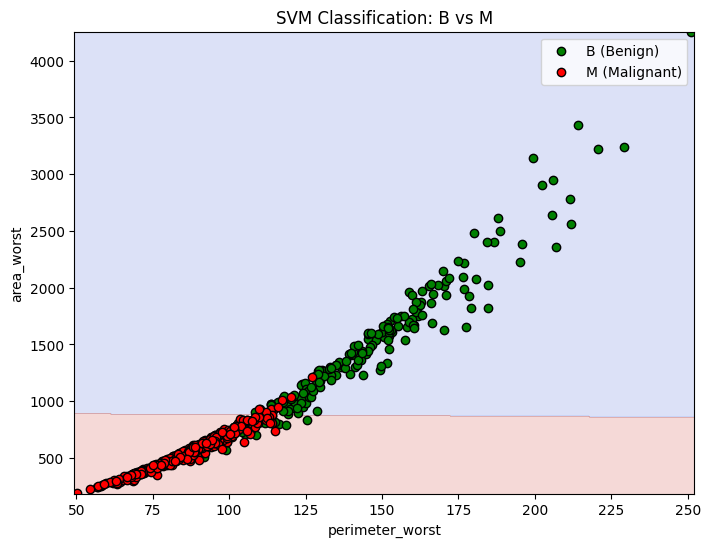

# **GRU-SVM**

# **V. Evaluation**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.datasets import load_breast_cancer

# Charger le dataset
data = load_breast_cancer()
X = data.data[:, [22, 23]]  # ex: perimeter_worst et area_worst
y = data.target  # 0 = B, 1 = M

# Créer et entraîner le SVM
model = SVC(kernel='rbf')
model.fit(X, y)

# Créer une grille pour tracer la frontière
xx, yy = np.meshgrid(np.linspace(X[:,0].min()-1, X[:,0].max()+1, 500),
                     np.linspace(X[:,1].min()-1, X[:,1].max()+1, 500))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot
plt.figure(figsize=(8,6))
plt.contourf(xx, yy, Z, alpha=0.2, cmap=plt.cm.coolwarm)
plt.scatter(X[:,0][y==0], X[:,1][y==0], color='green', label='B (Benign)', edgecolors='k')
plt.scatter(X[:,0][y==1], X[:,1][y==1], color='red', label='M (Malignant)', edgecolors='k')
plt.xlabel('perimeter_worst')
plt.ylabel('area_worst')
plt.title('SVM Classification: B vs M')
plt.legend()
plt.show()

# **VI. Deployment**